In [22]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

from cnmaps import get_adm_maps, clip_quiver_by_map, clip_contours_by_map, draw_map, clip_pcolormesh_by_map
import geopandas as gpd
from shapely.ops import unary_union


from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = datadir + 'Contribution/RandomForest_output/'
# citylist = ['Zhaoqing','Huizhou','Guangzhou','Foshan',
#             'Dongguan','Shenzhen','Zhongshan','Jiangmen',
#             'Zhuhai']
# variants = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES',
#             'WSPD10', 'WDIR10', 'CloudFRAC',]

dslow  = xr.open_dataset(filepath + 'RF_grids_low.nc')
dshigh = xr.open_dataset(filepath + 'RF_grids_high.nc')

In [3]:
dslow

<xarray.Dataset>
Dimensions:    (y: 110, x: 152)
Coordinates:
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    SFC_TMP    (y, x) float64 ...
    SOL_RAD    (y, x) float64 ...
    RH         (y, x) float64 ...
    PRES       (y, x) float64 ...
    WSPD10     (y, x) float64 ...
    WDIR10     (y, x) float64 ...
    CloudFRAC  (y, x) float64 ...
    mse        (y, x) float64 ...
    r2         (y, x) float64 ...

## 地图

In [34]:
def plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap):
    lon = ds.longitude
    lat = ds.latitude

    cflevel = np.arange(0,cmax+0.0001,cfstep)
    cbticks = np.arange(0,cmax+0.0001,cbstep)

    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

    cities = ['广州市', '佛山市', '深圳市', '东莞市', '珠海市', '中山市', '惠州市', '江门市', '肇庆市']
    multi_polygons = []
    for city in cities:
        polygon = get_adm_maps(city=city, record='first', only_polygon=True)
        multi_polygons.append(polygon)
        draw_map(polygon, color='gray', linewidth=0.8)

    map_polygon = unary_union(multi_polygons)

    ax.set_extent([111.2, 115.5, 21.4, 24.5], ccrs.PlateCarree())

    cf = ax.contourf(lon, lat, ds[var], levels=cflevel, extend='both',
                    transform=ccrs.PlateCarree(), cmap=colormap,)
    clip_contours_by_map(cf, map_polygon)

    cbar = plt.colorbar(cf)
    cbar.set_ticks(cbticks)
    cbar.set_label('Importance')

    title_dict={'fontsize':16,'fontweight':'bold','loc':'left'}
    ax.set_title(f'({sequence}) {var}',**title_dict)
    plt.show()

## Low

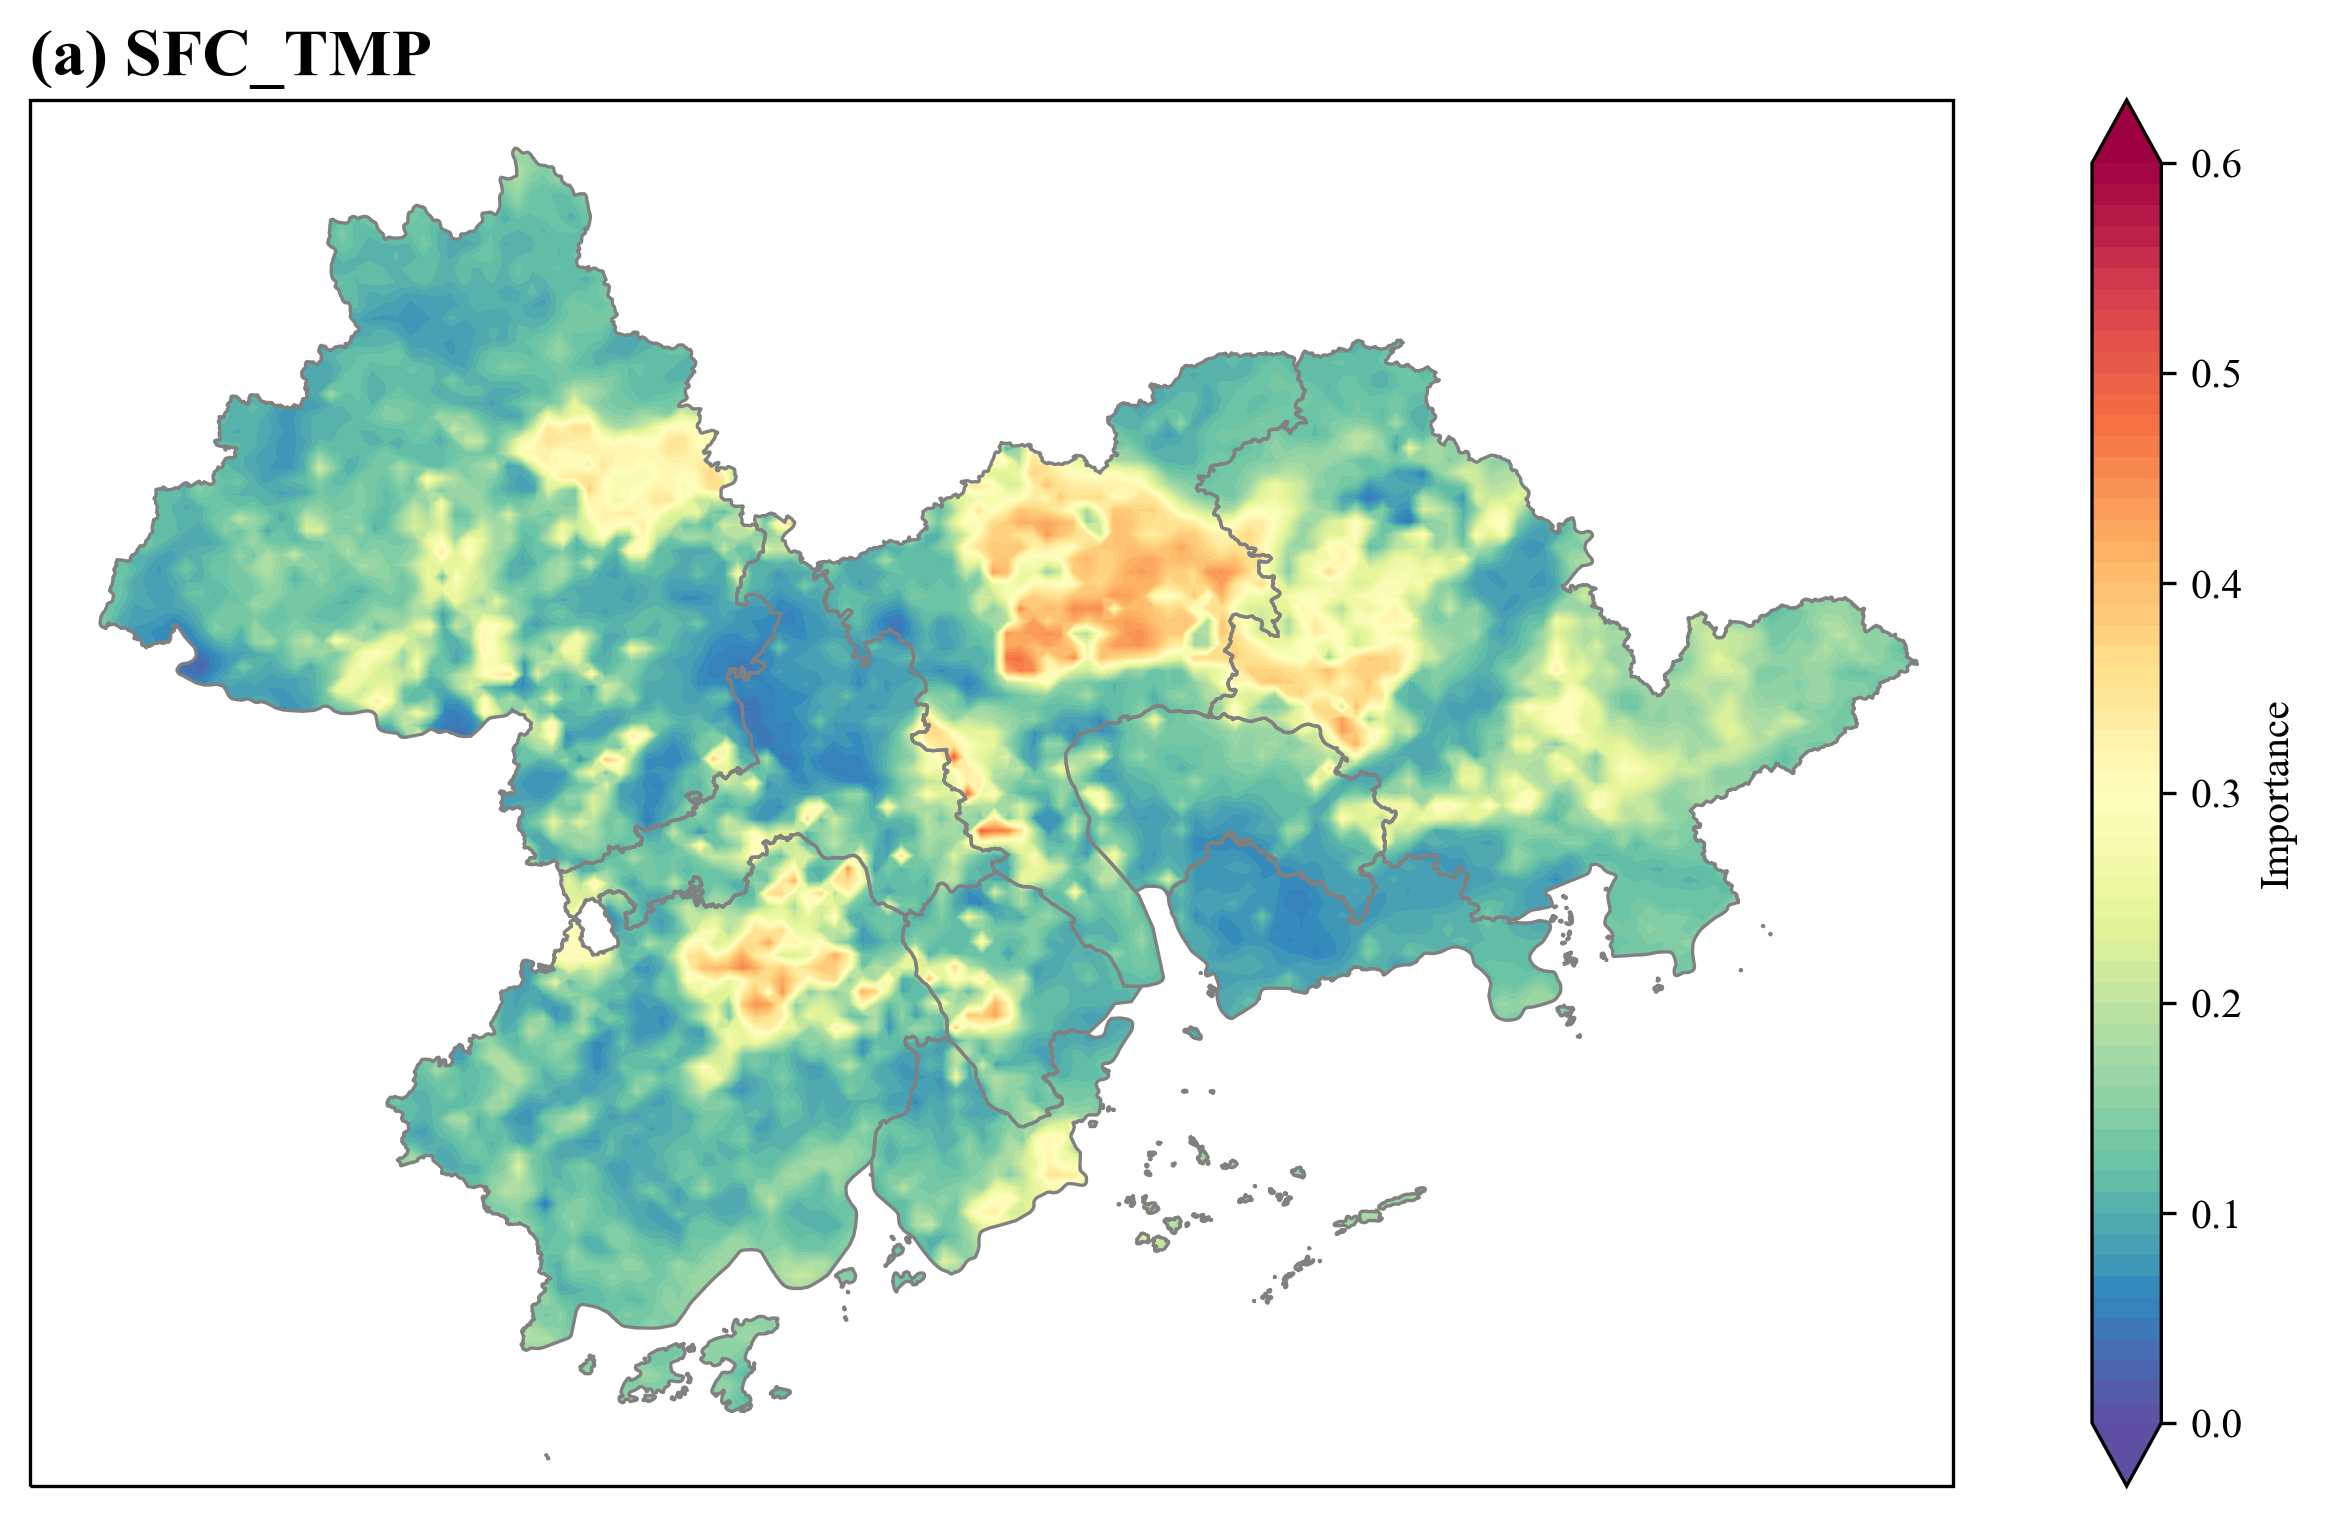

In [16]:
ds       = dslow
sequence = 'a'
var      = 'SFC_TMP'
cmax     = 0.6
cfstep   = 0.01
cbstep   = 0.1
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

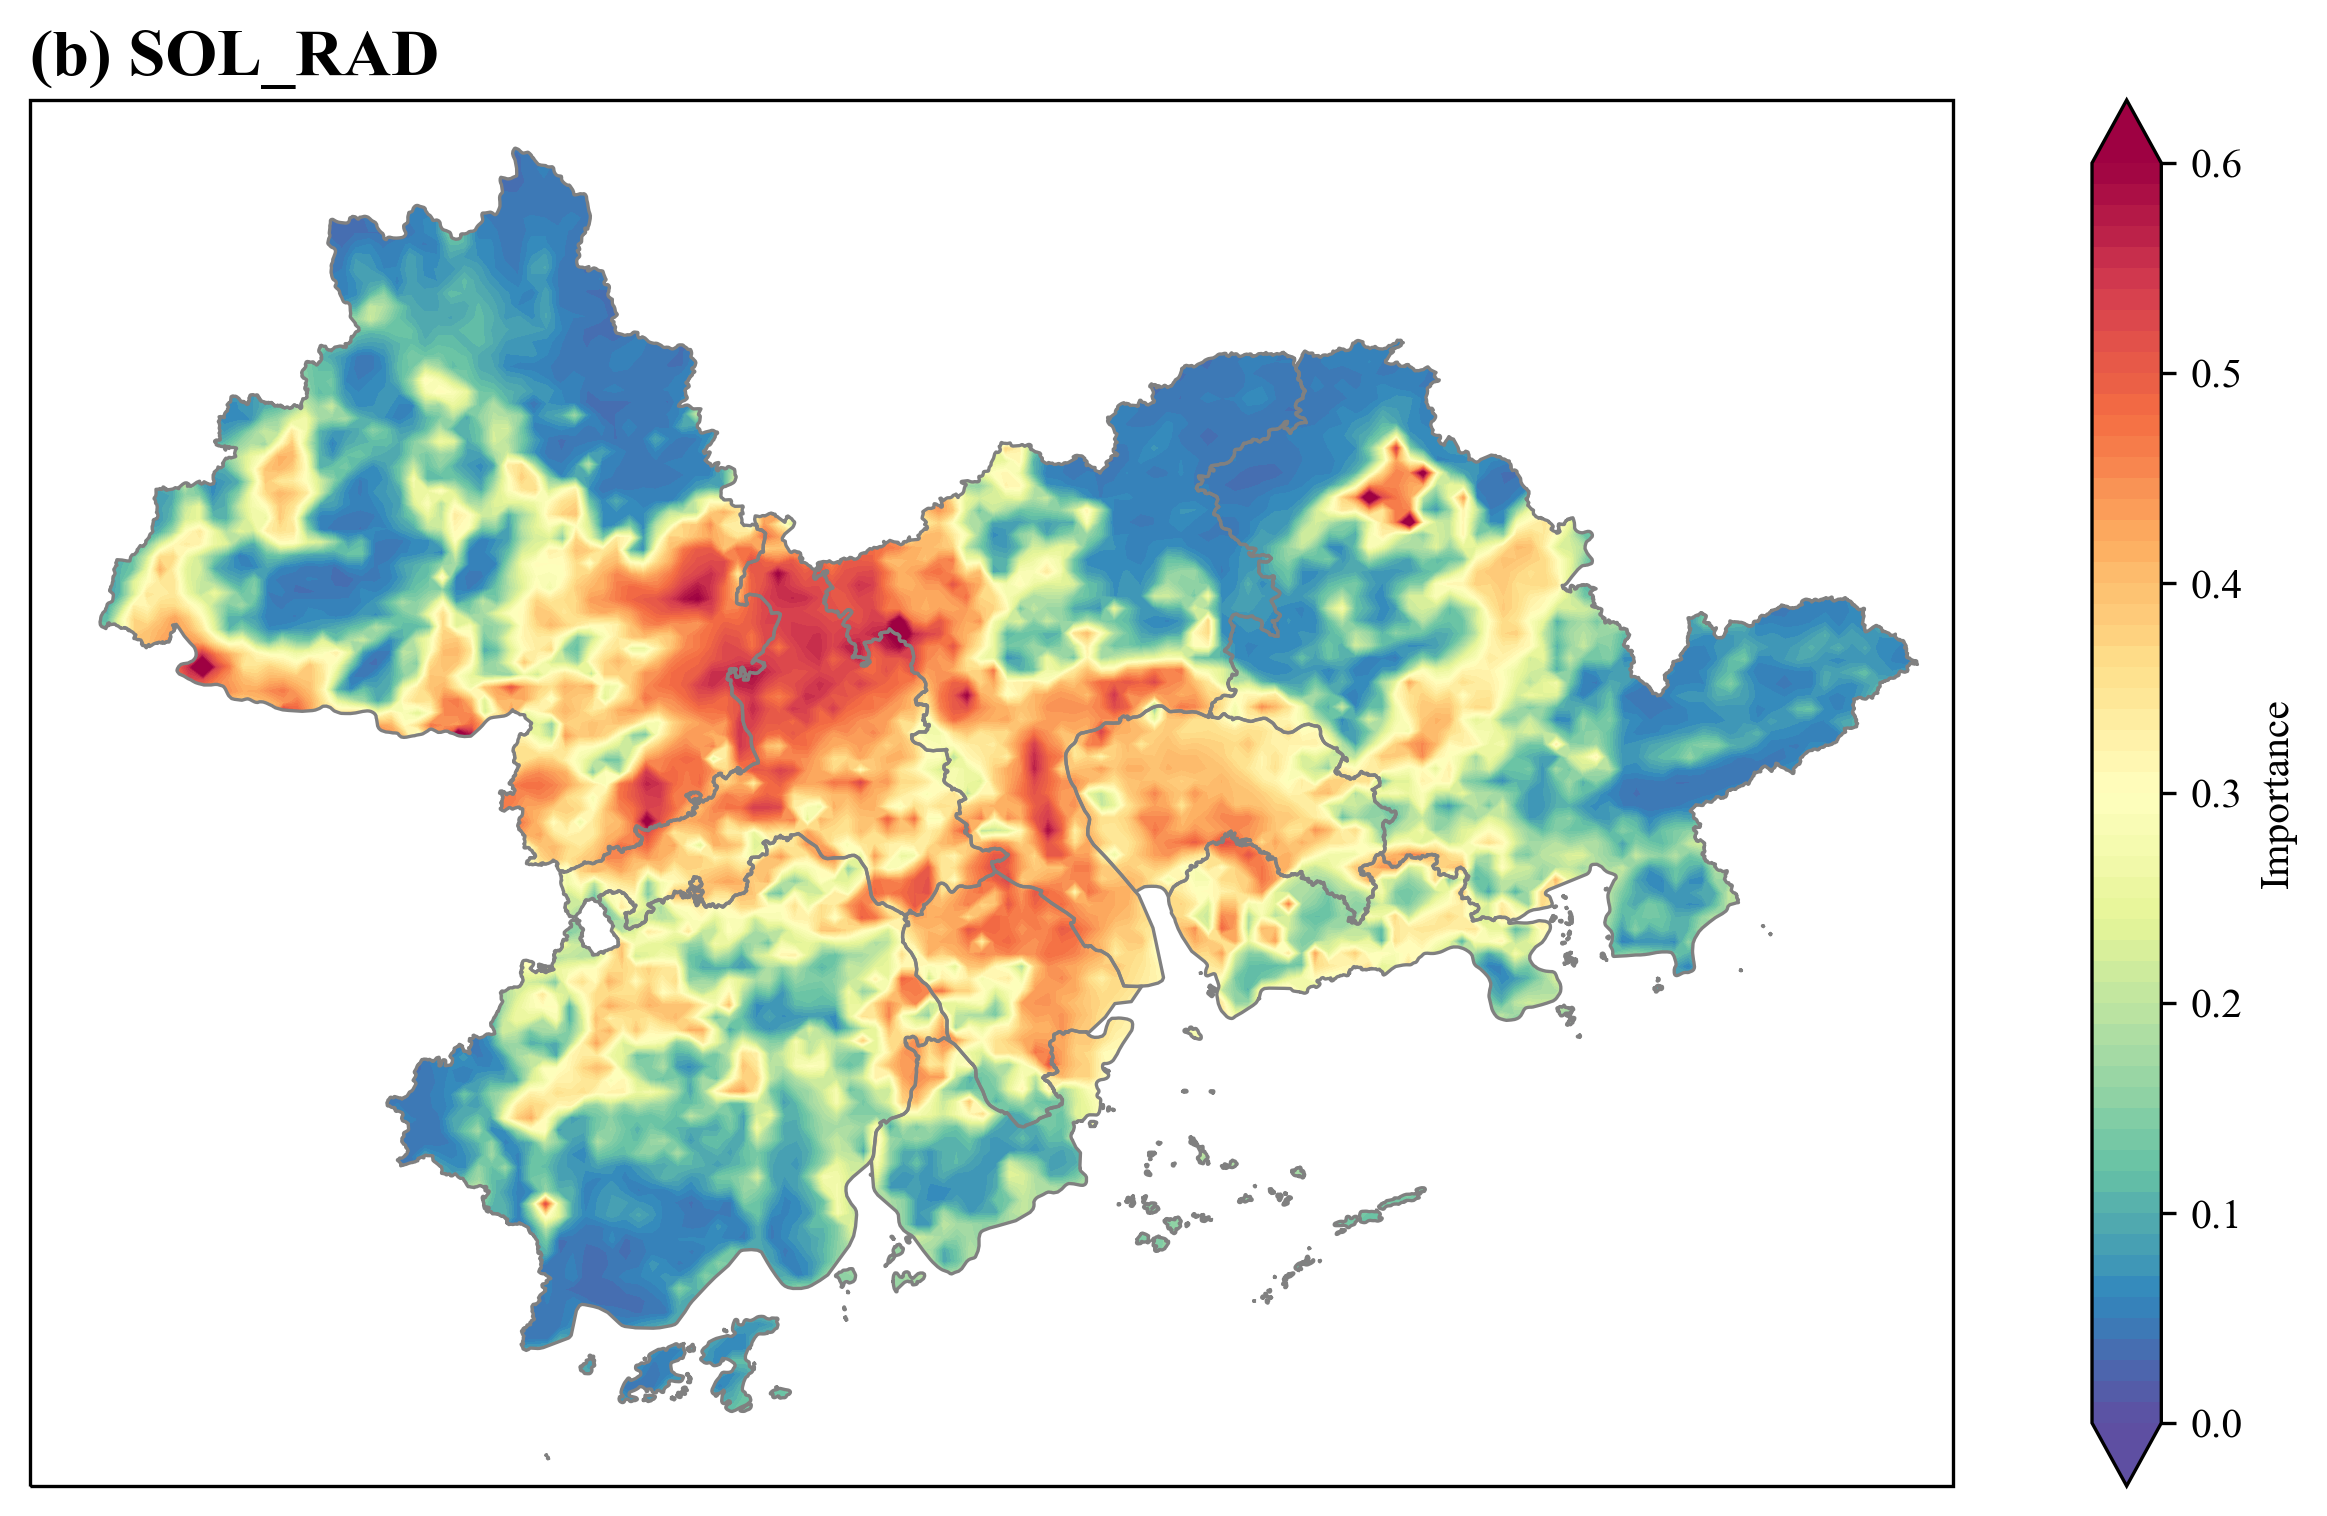

In [20]:
ds       = dslow
sequence = 'b'
var      = 'SOL_RAD'
cmax     = 0.6
cfstep   = 0.01
cbstep   = 0.1
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

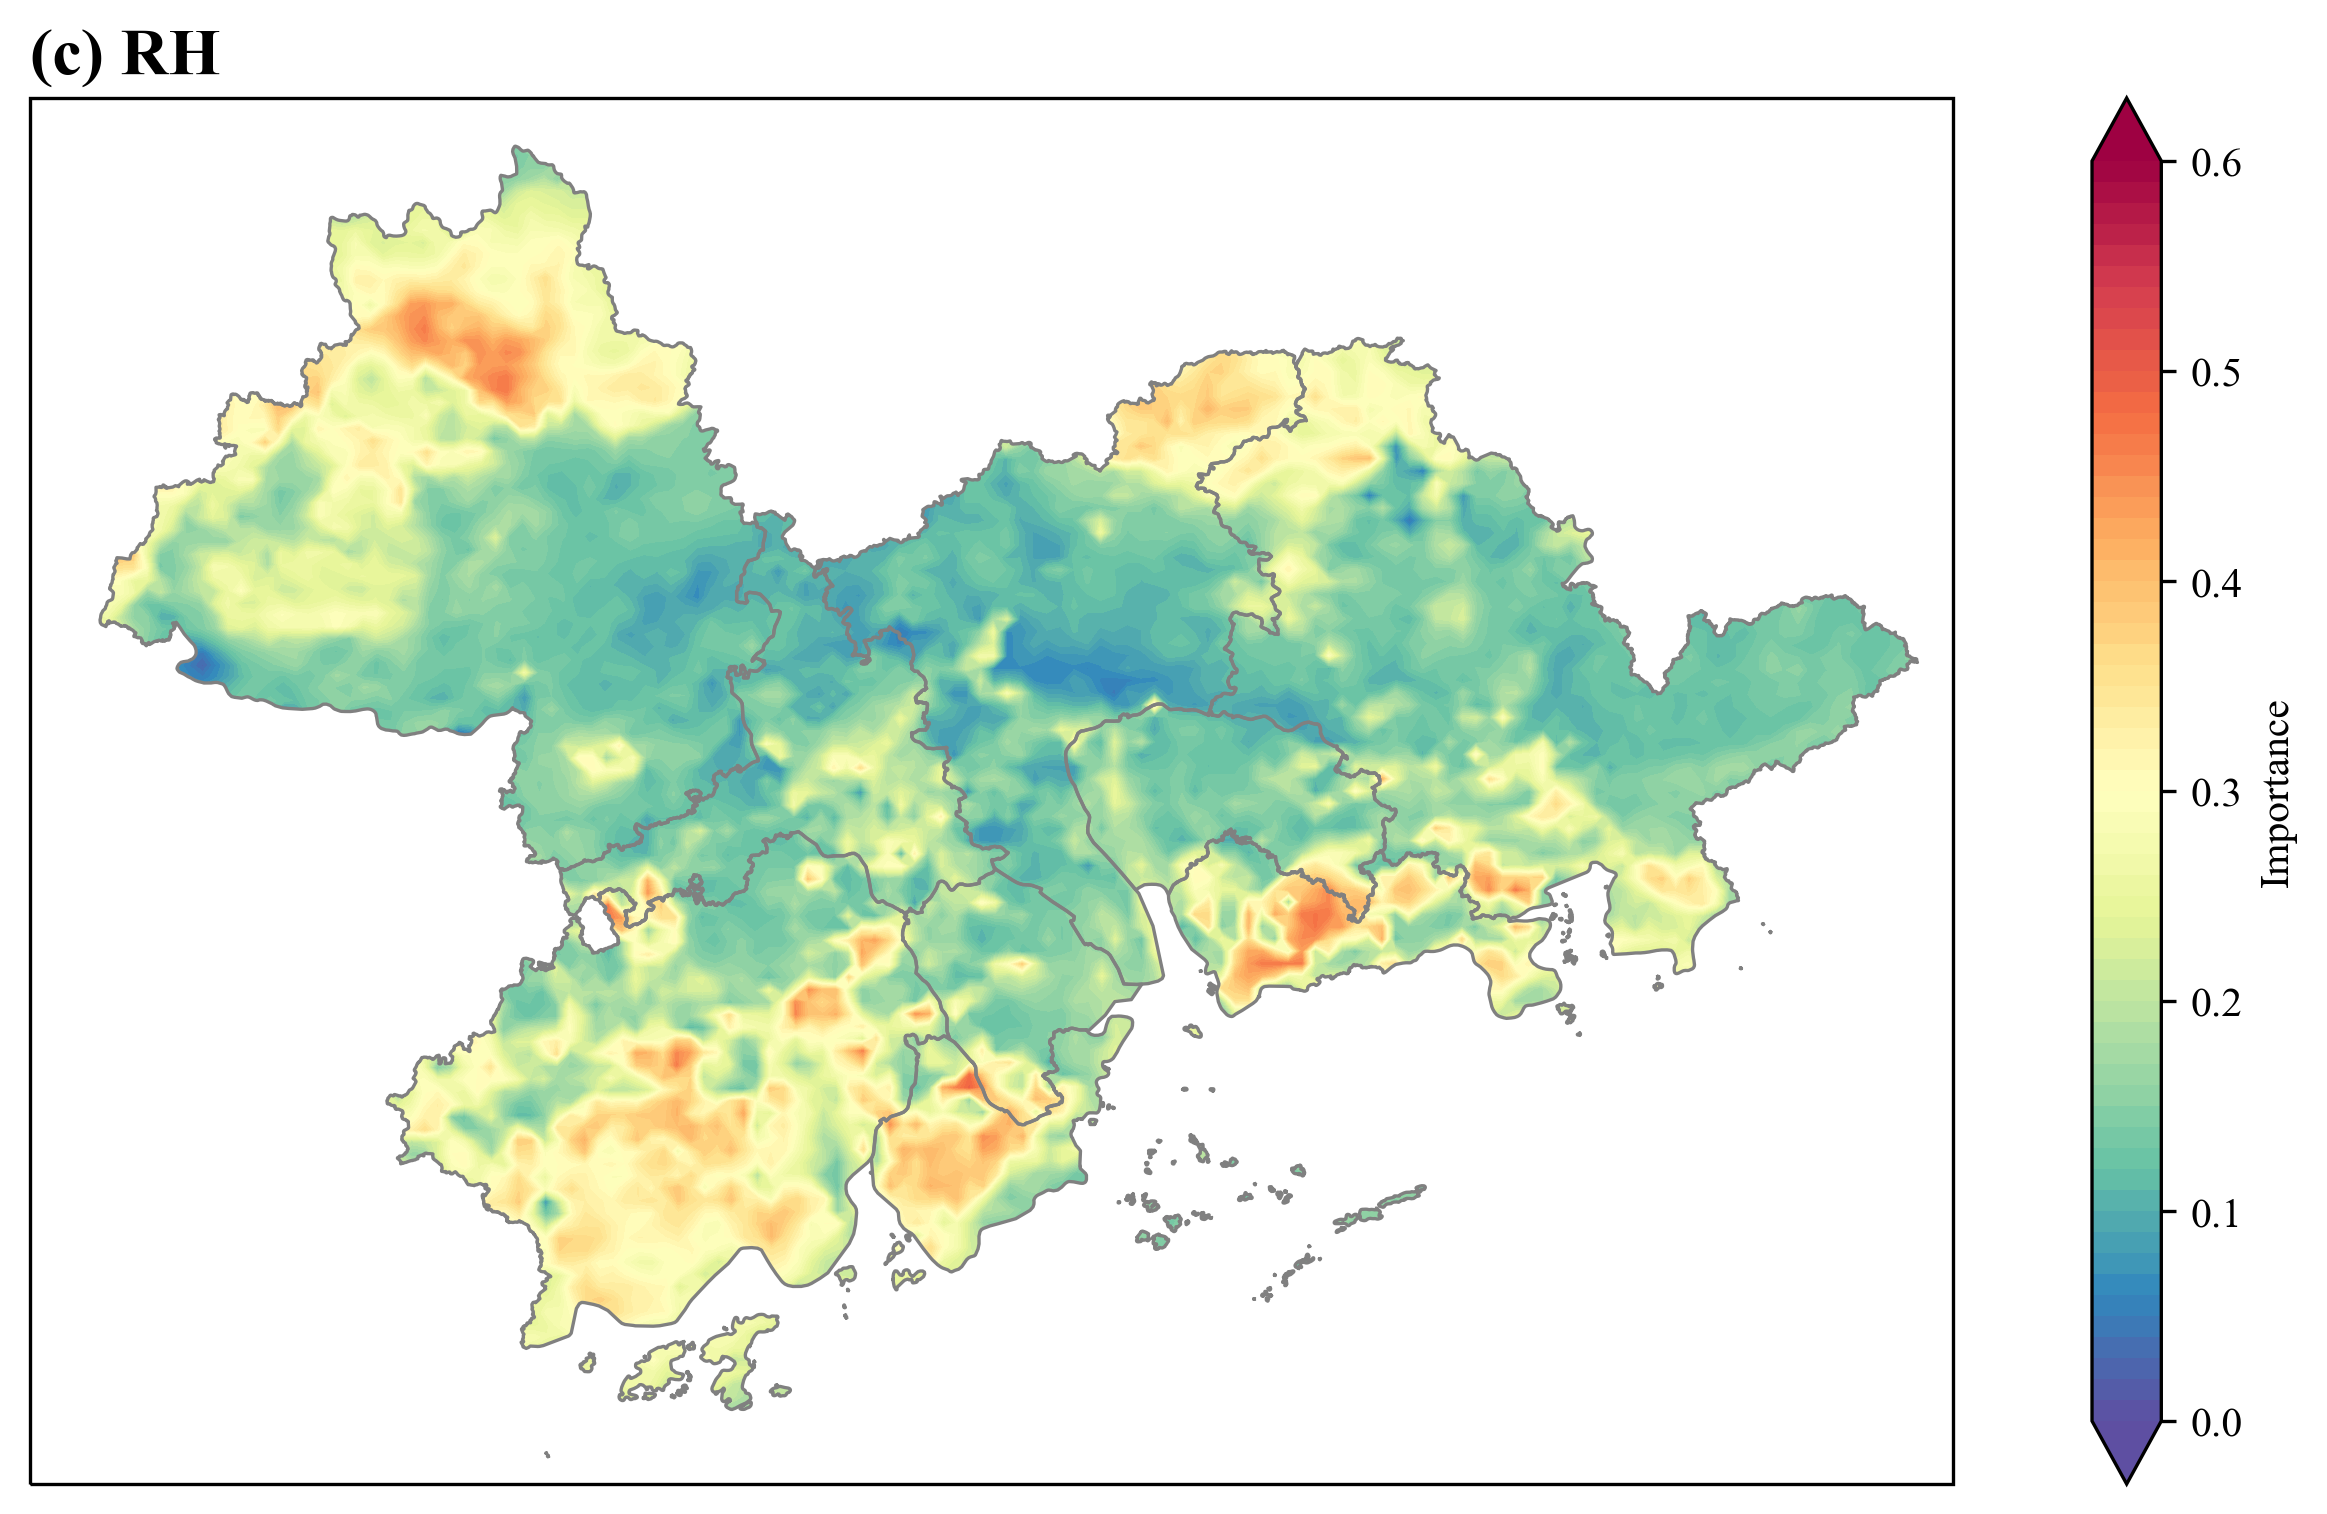

In [24]:
ds       = dslow
sequence = 'c'
var      = 'RH'
cmax     = 0.6
cfstep   = 0.01
cbstep   = 0.1
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

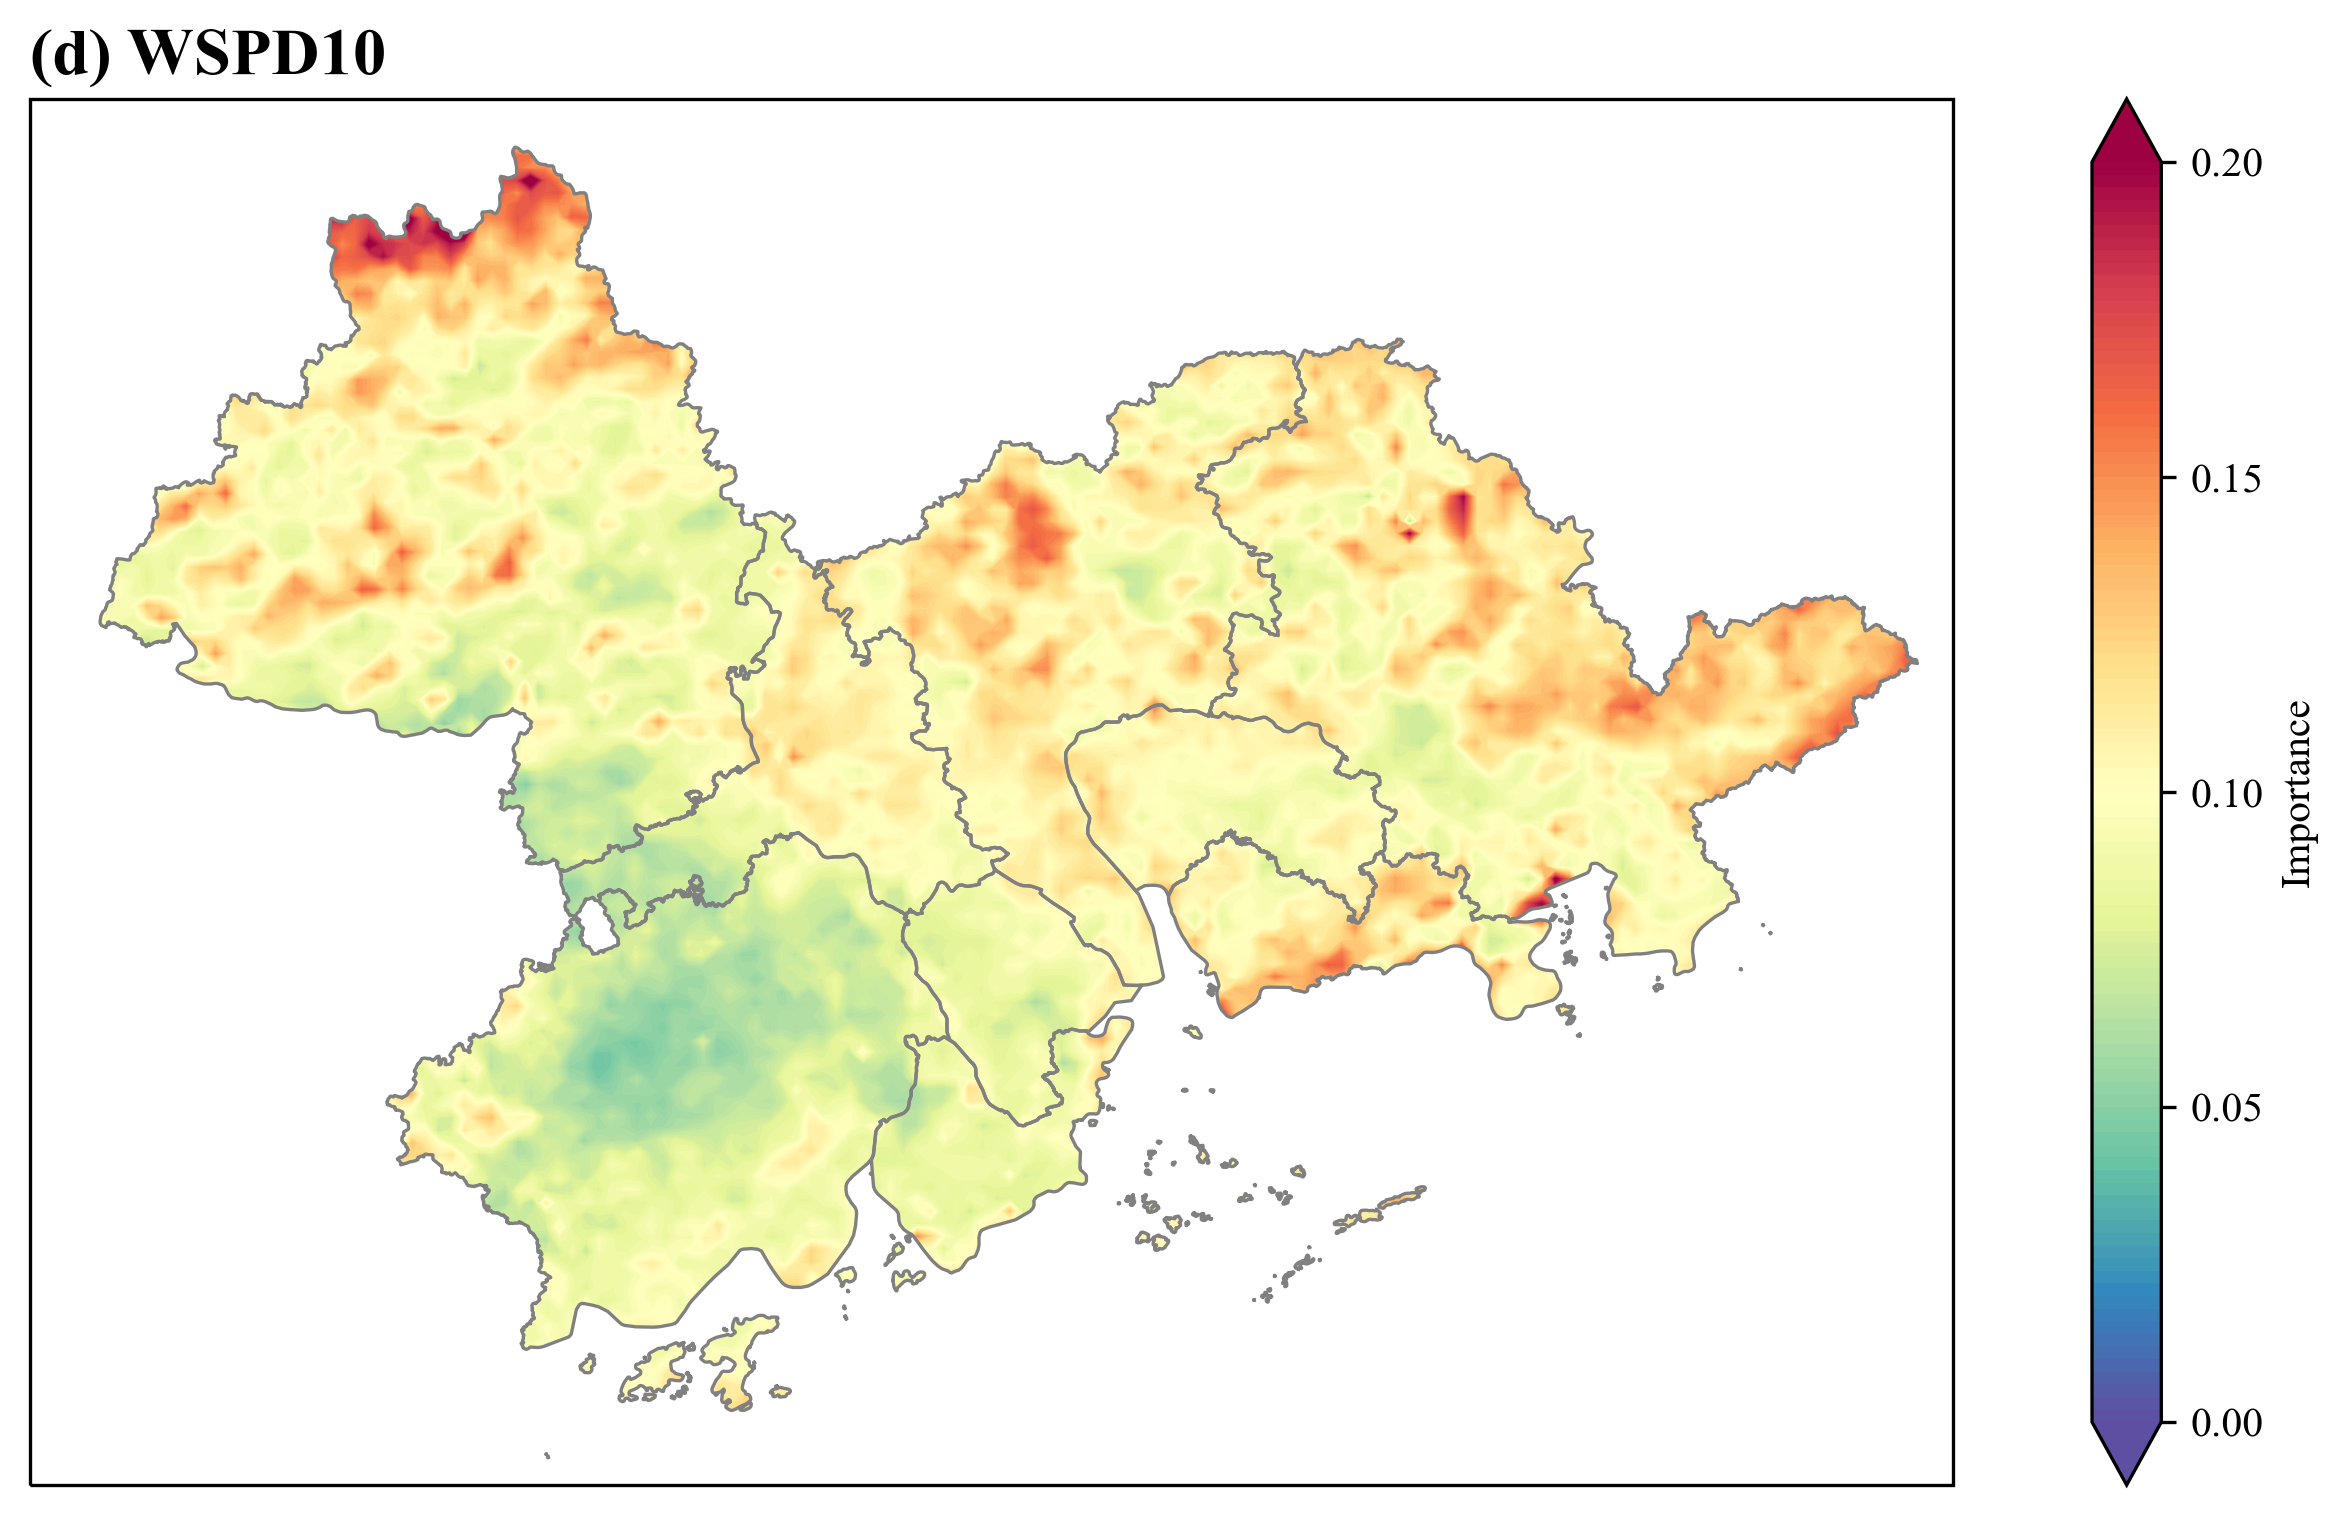

In [35]:
ds       = dslow
sequence = 'd'
var      = 'WSPD10'
cmax     = 0.2
cfstep   = 0.002
cbstep   = 0.05
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

## High

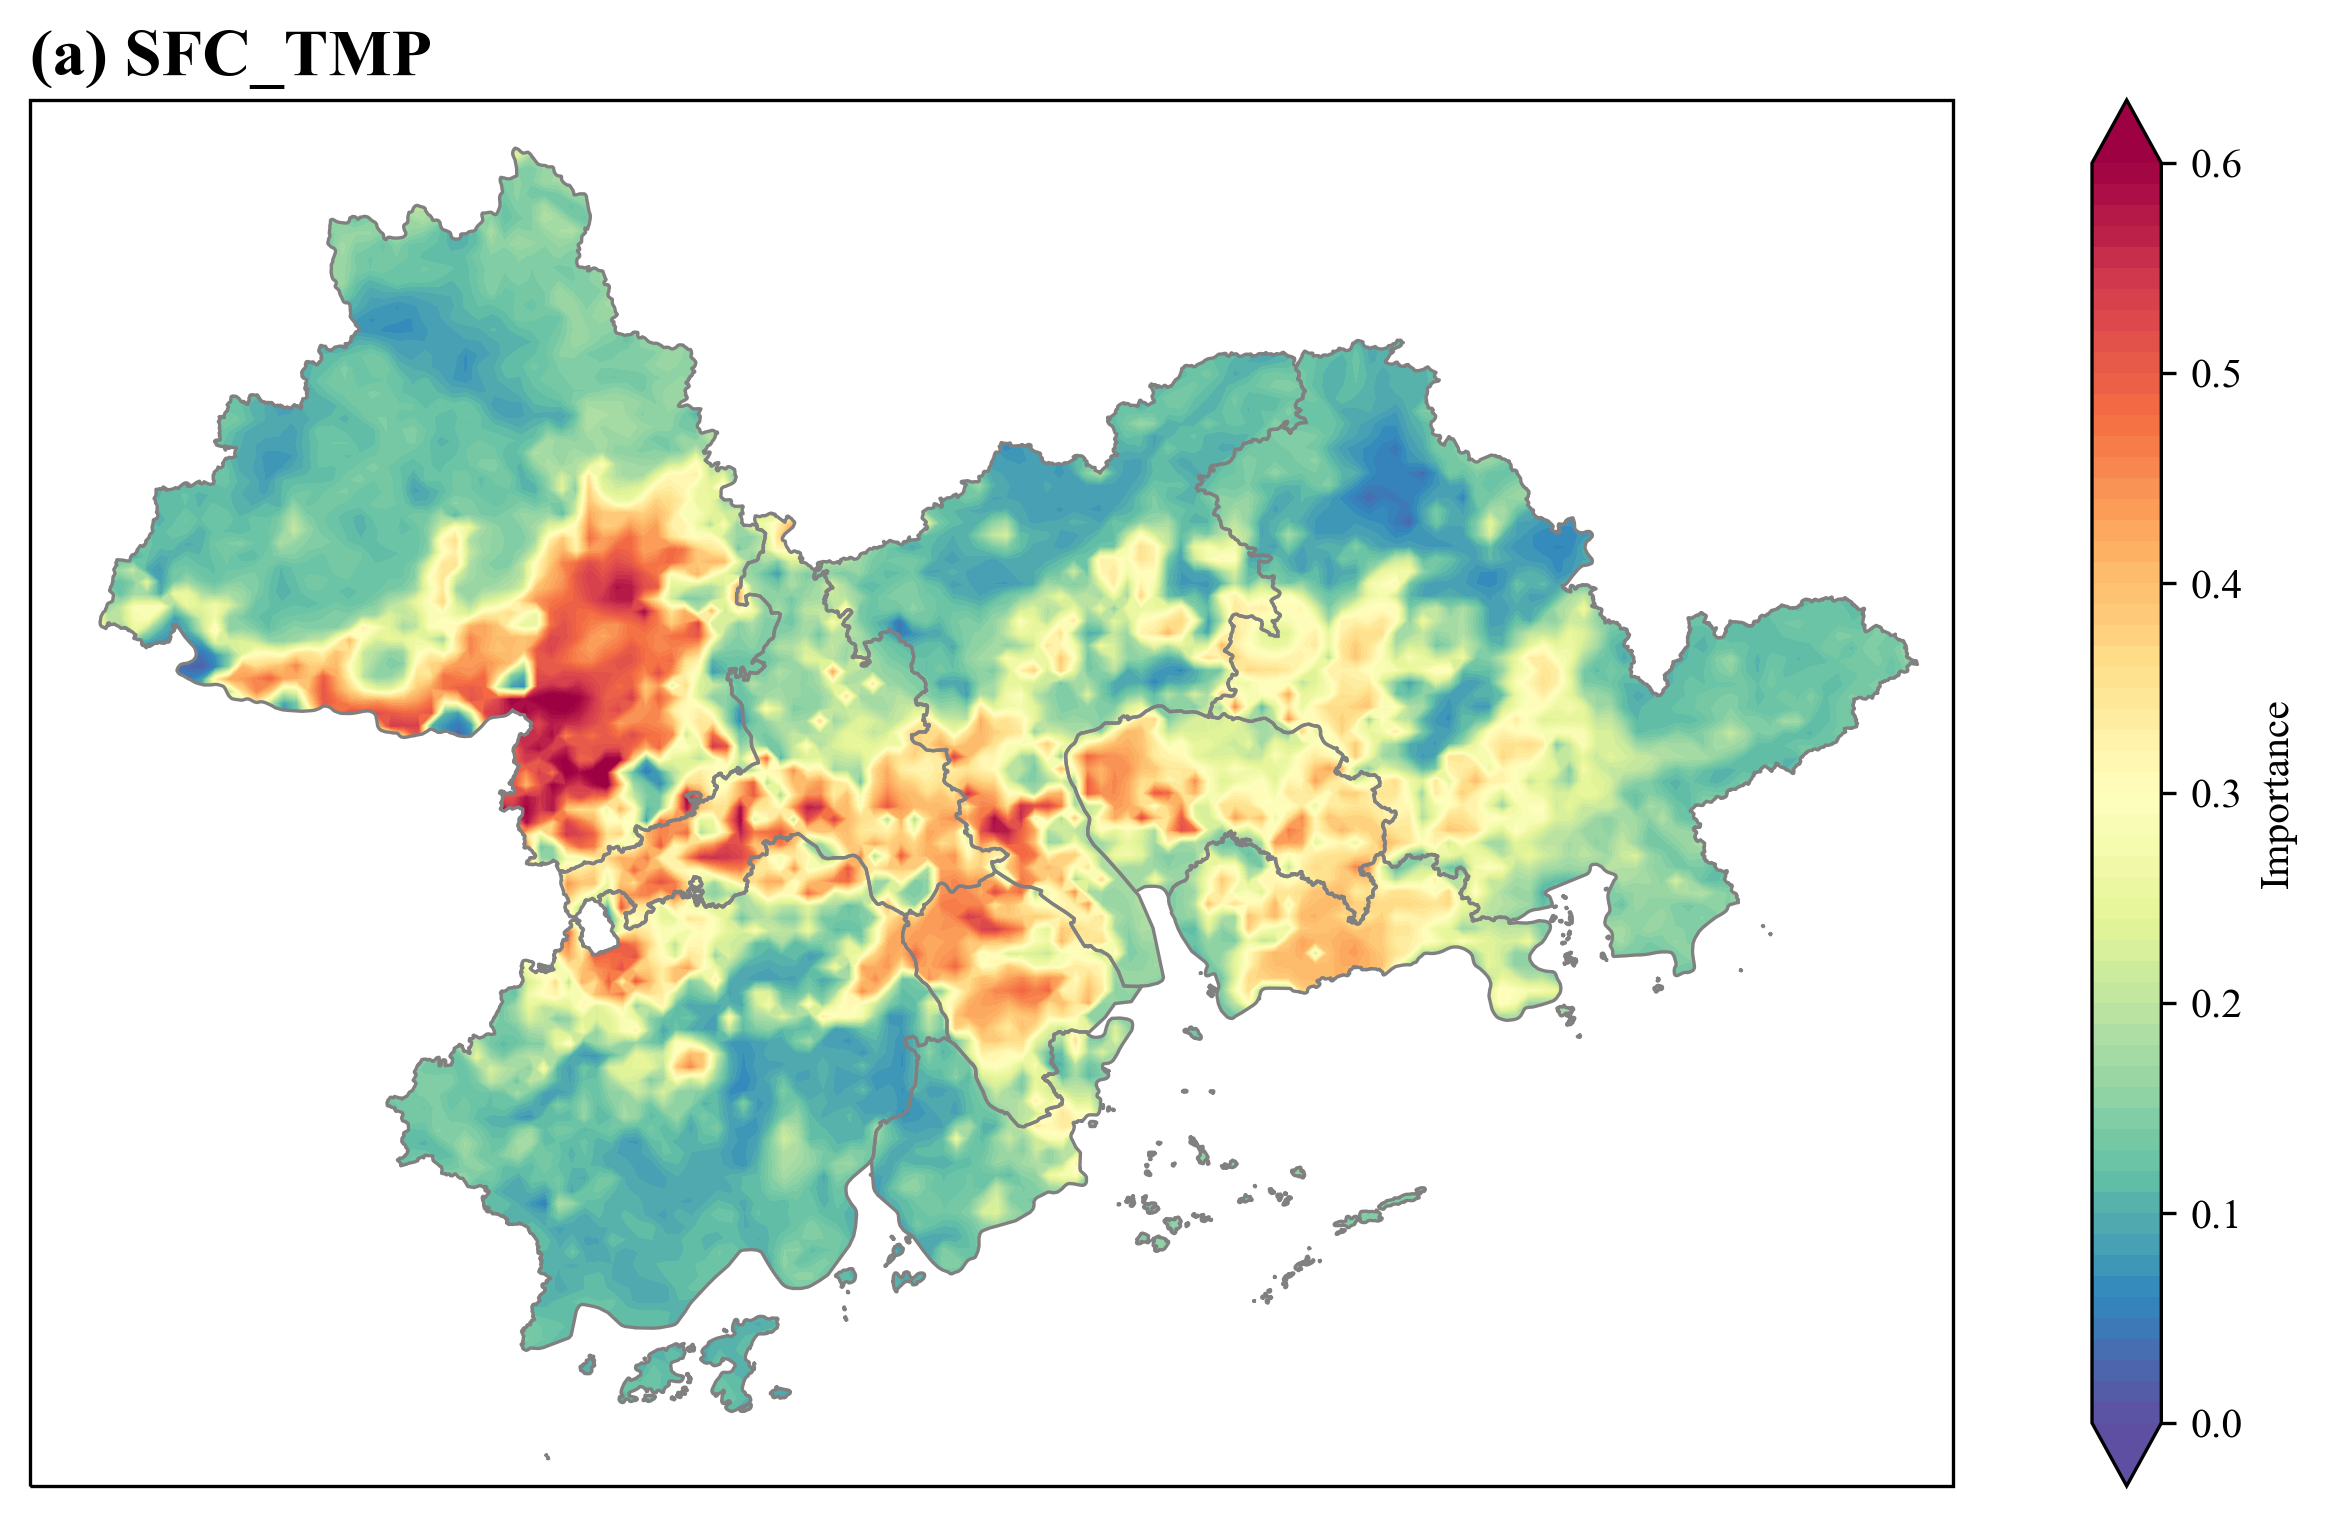

In [27]:
ds       = dshigh
sequence = 'a'
var      = 'SFC_TMP'
cmax     = 0.6
cfstep   = 0.01
cbstep   = 0.1
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

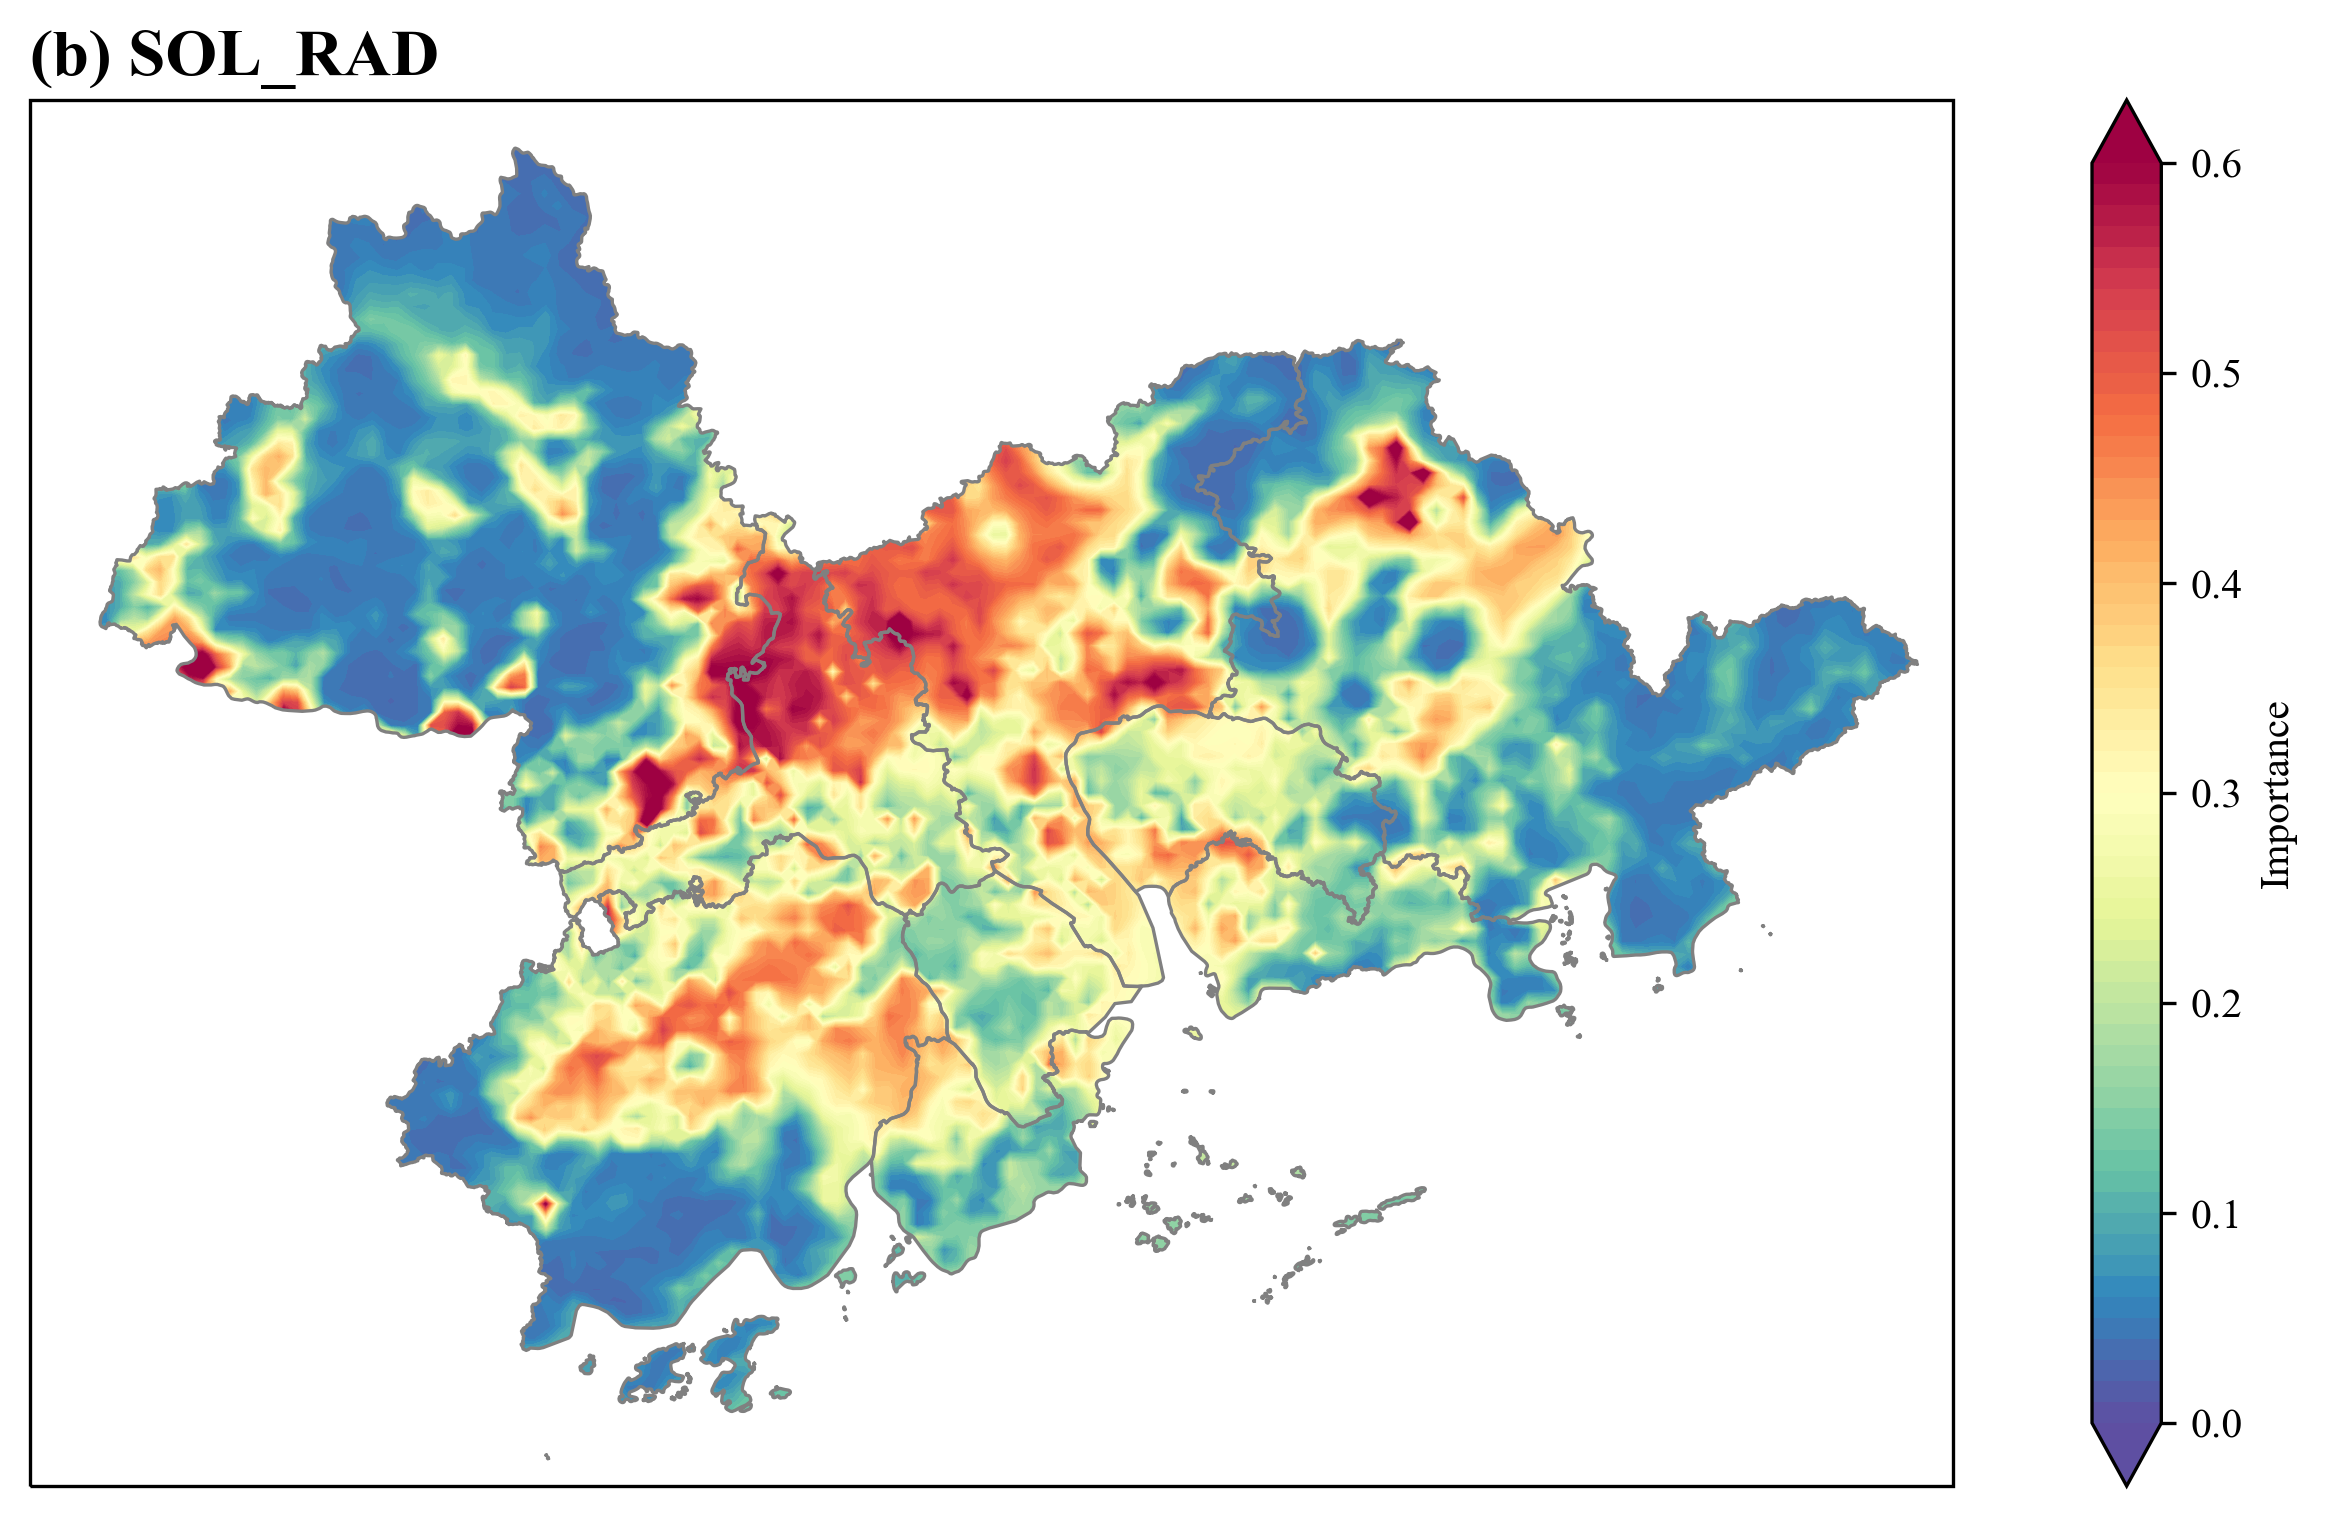

In [ ]:
ds       = dshigh
sequence = 'b'
var      = 'SOL_RAD'
cmax     = 0.6
cfstep   = 0.01
cbstep   = 0.1
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

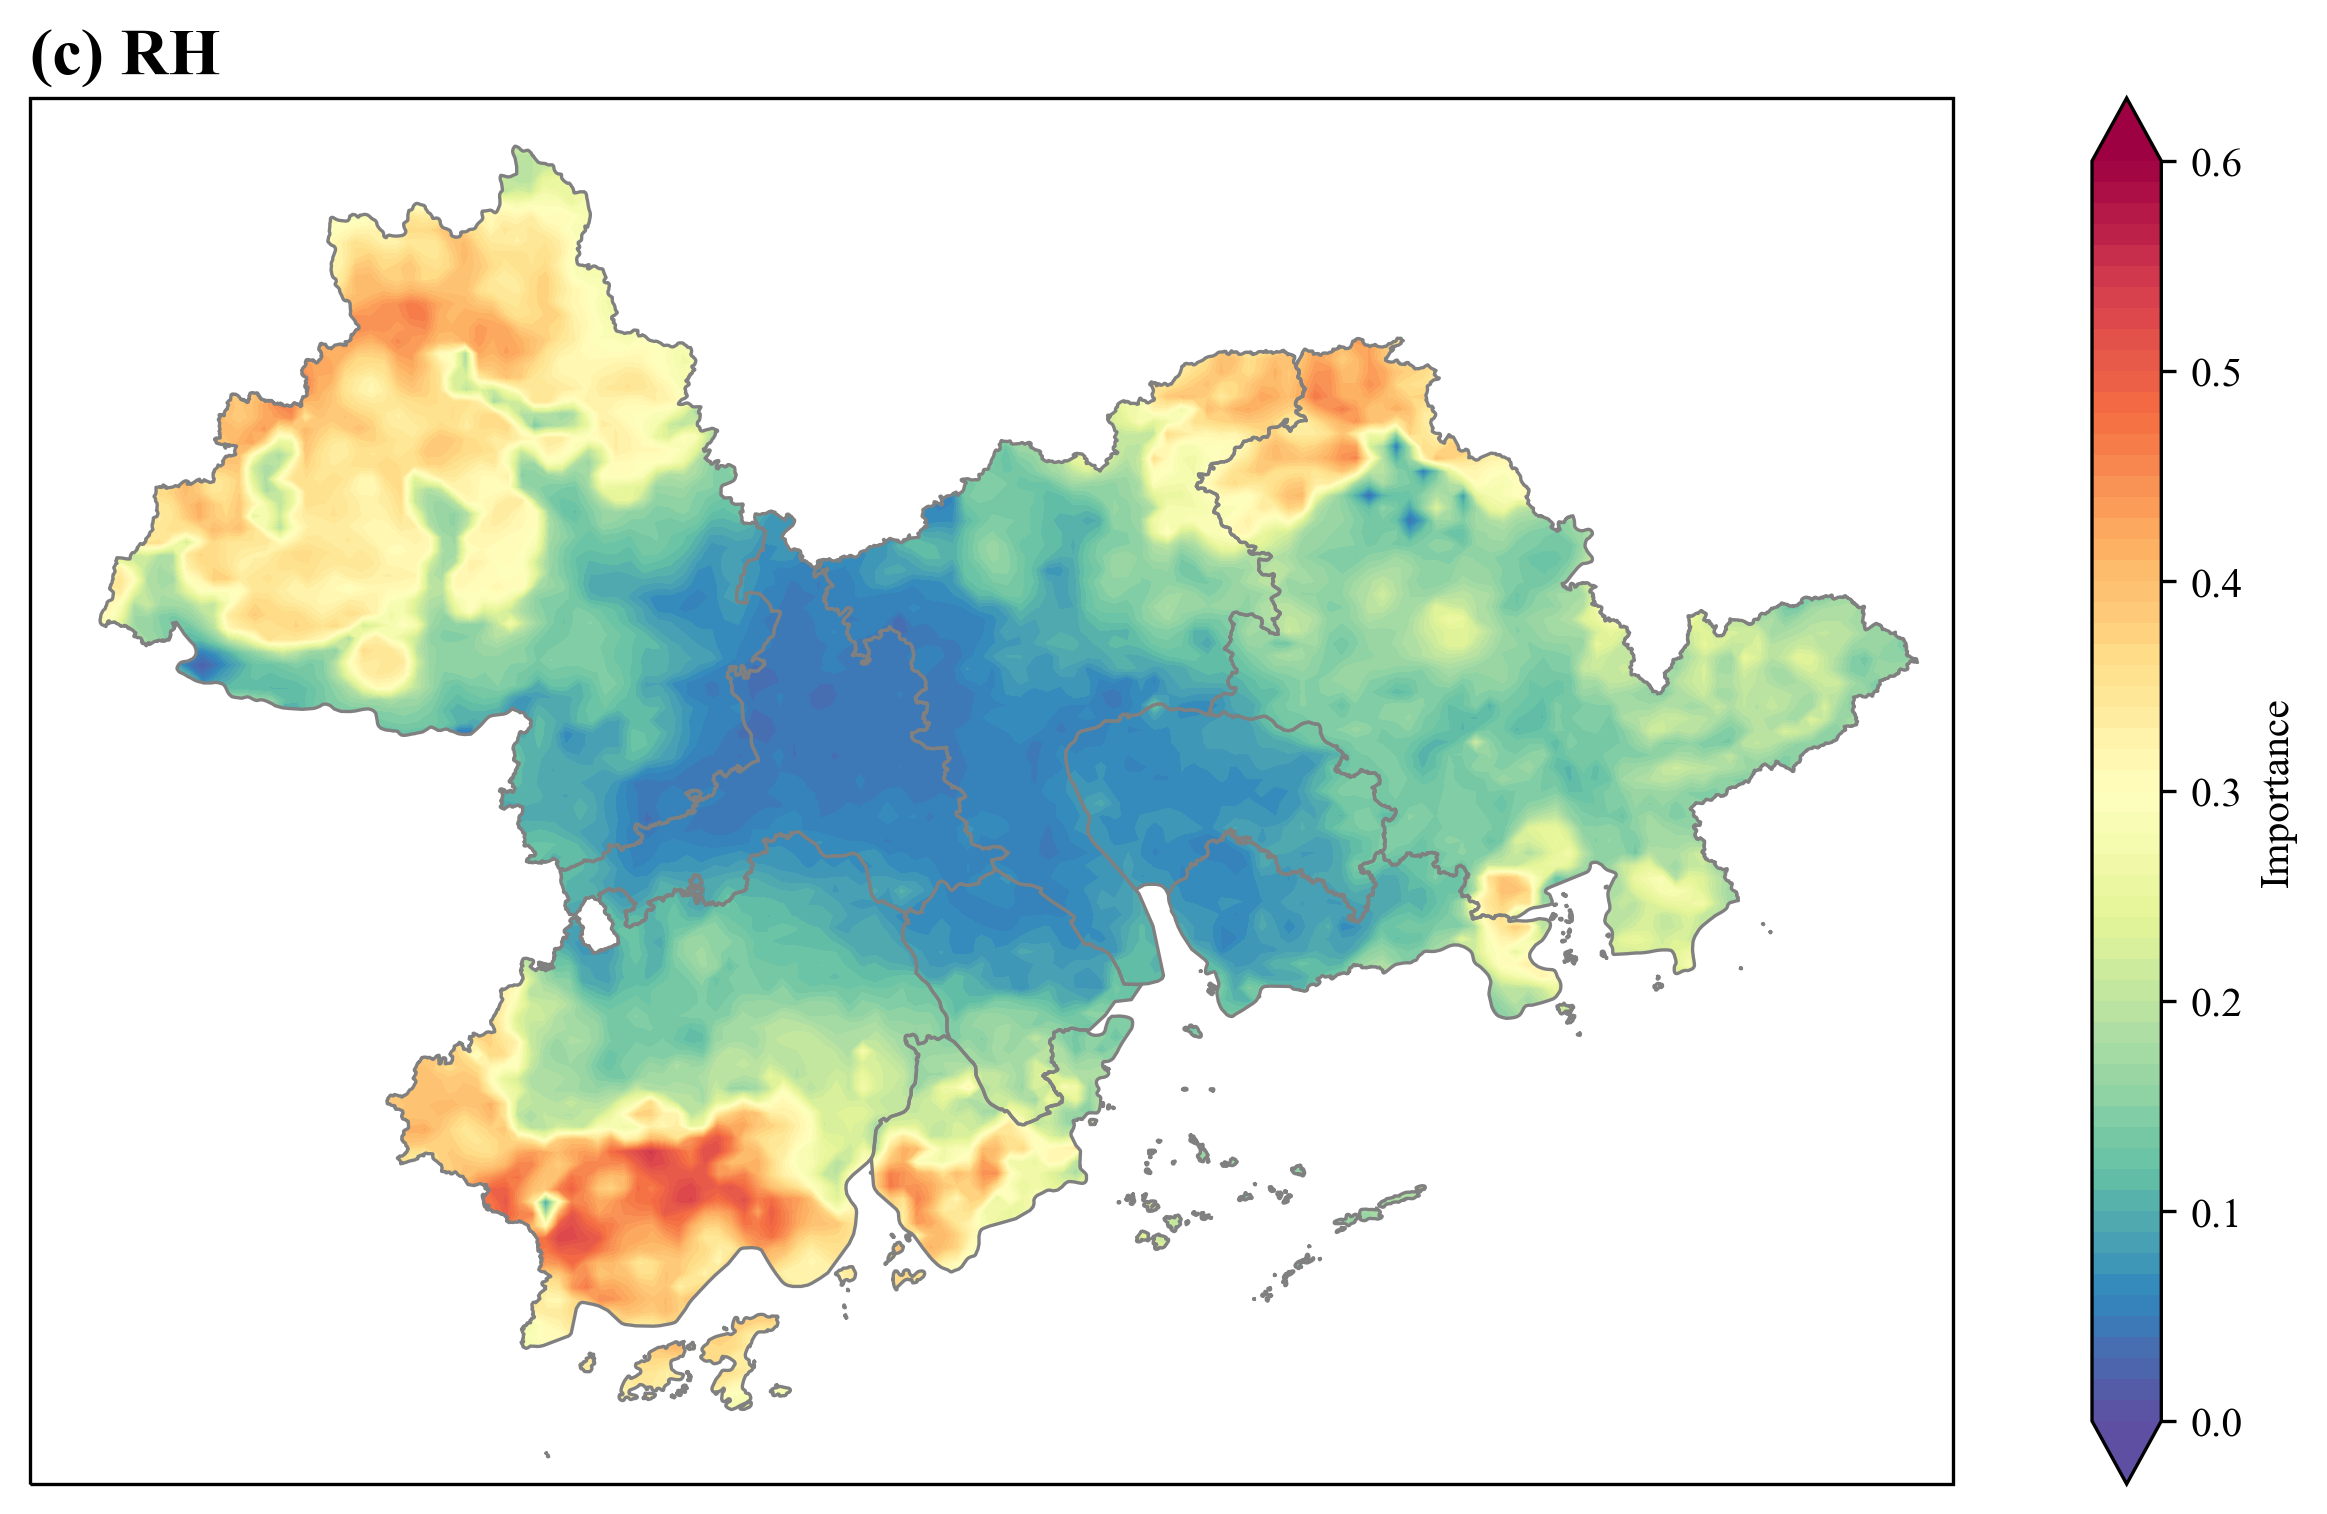

In [ ]:
ds       = dshigh
sequence = 'c'
var      = 'RH'
cmax     = 0.6
cfstep   = 0.01
cbstep   = 0.1
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

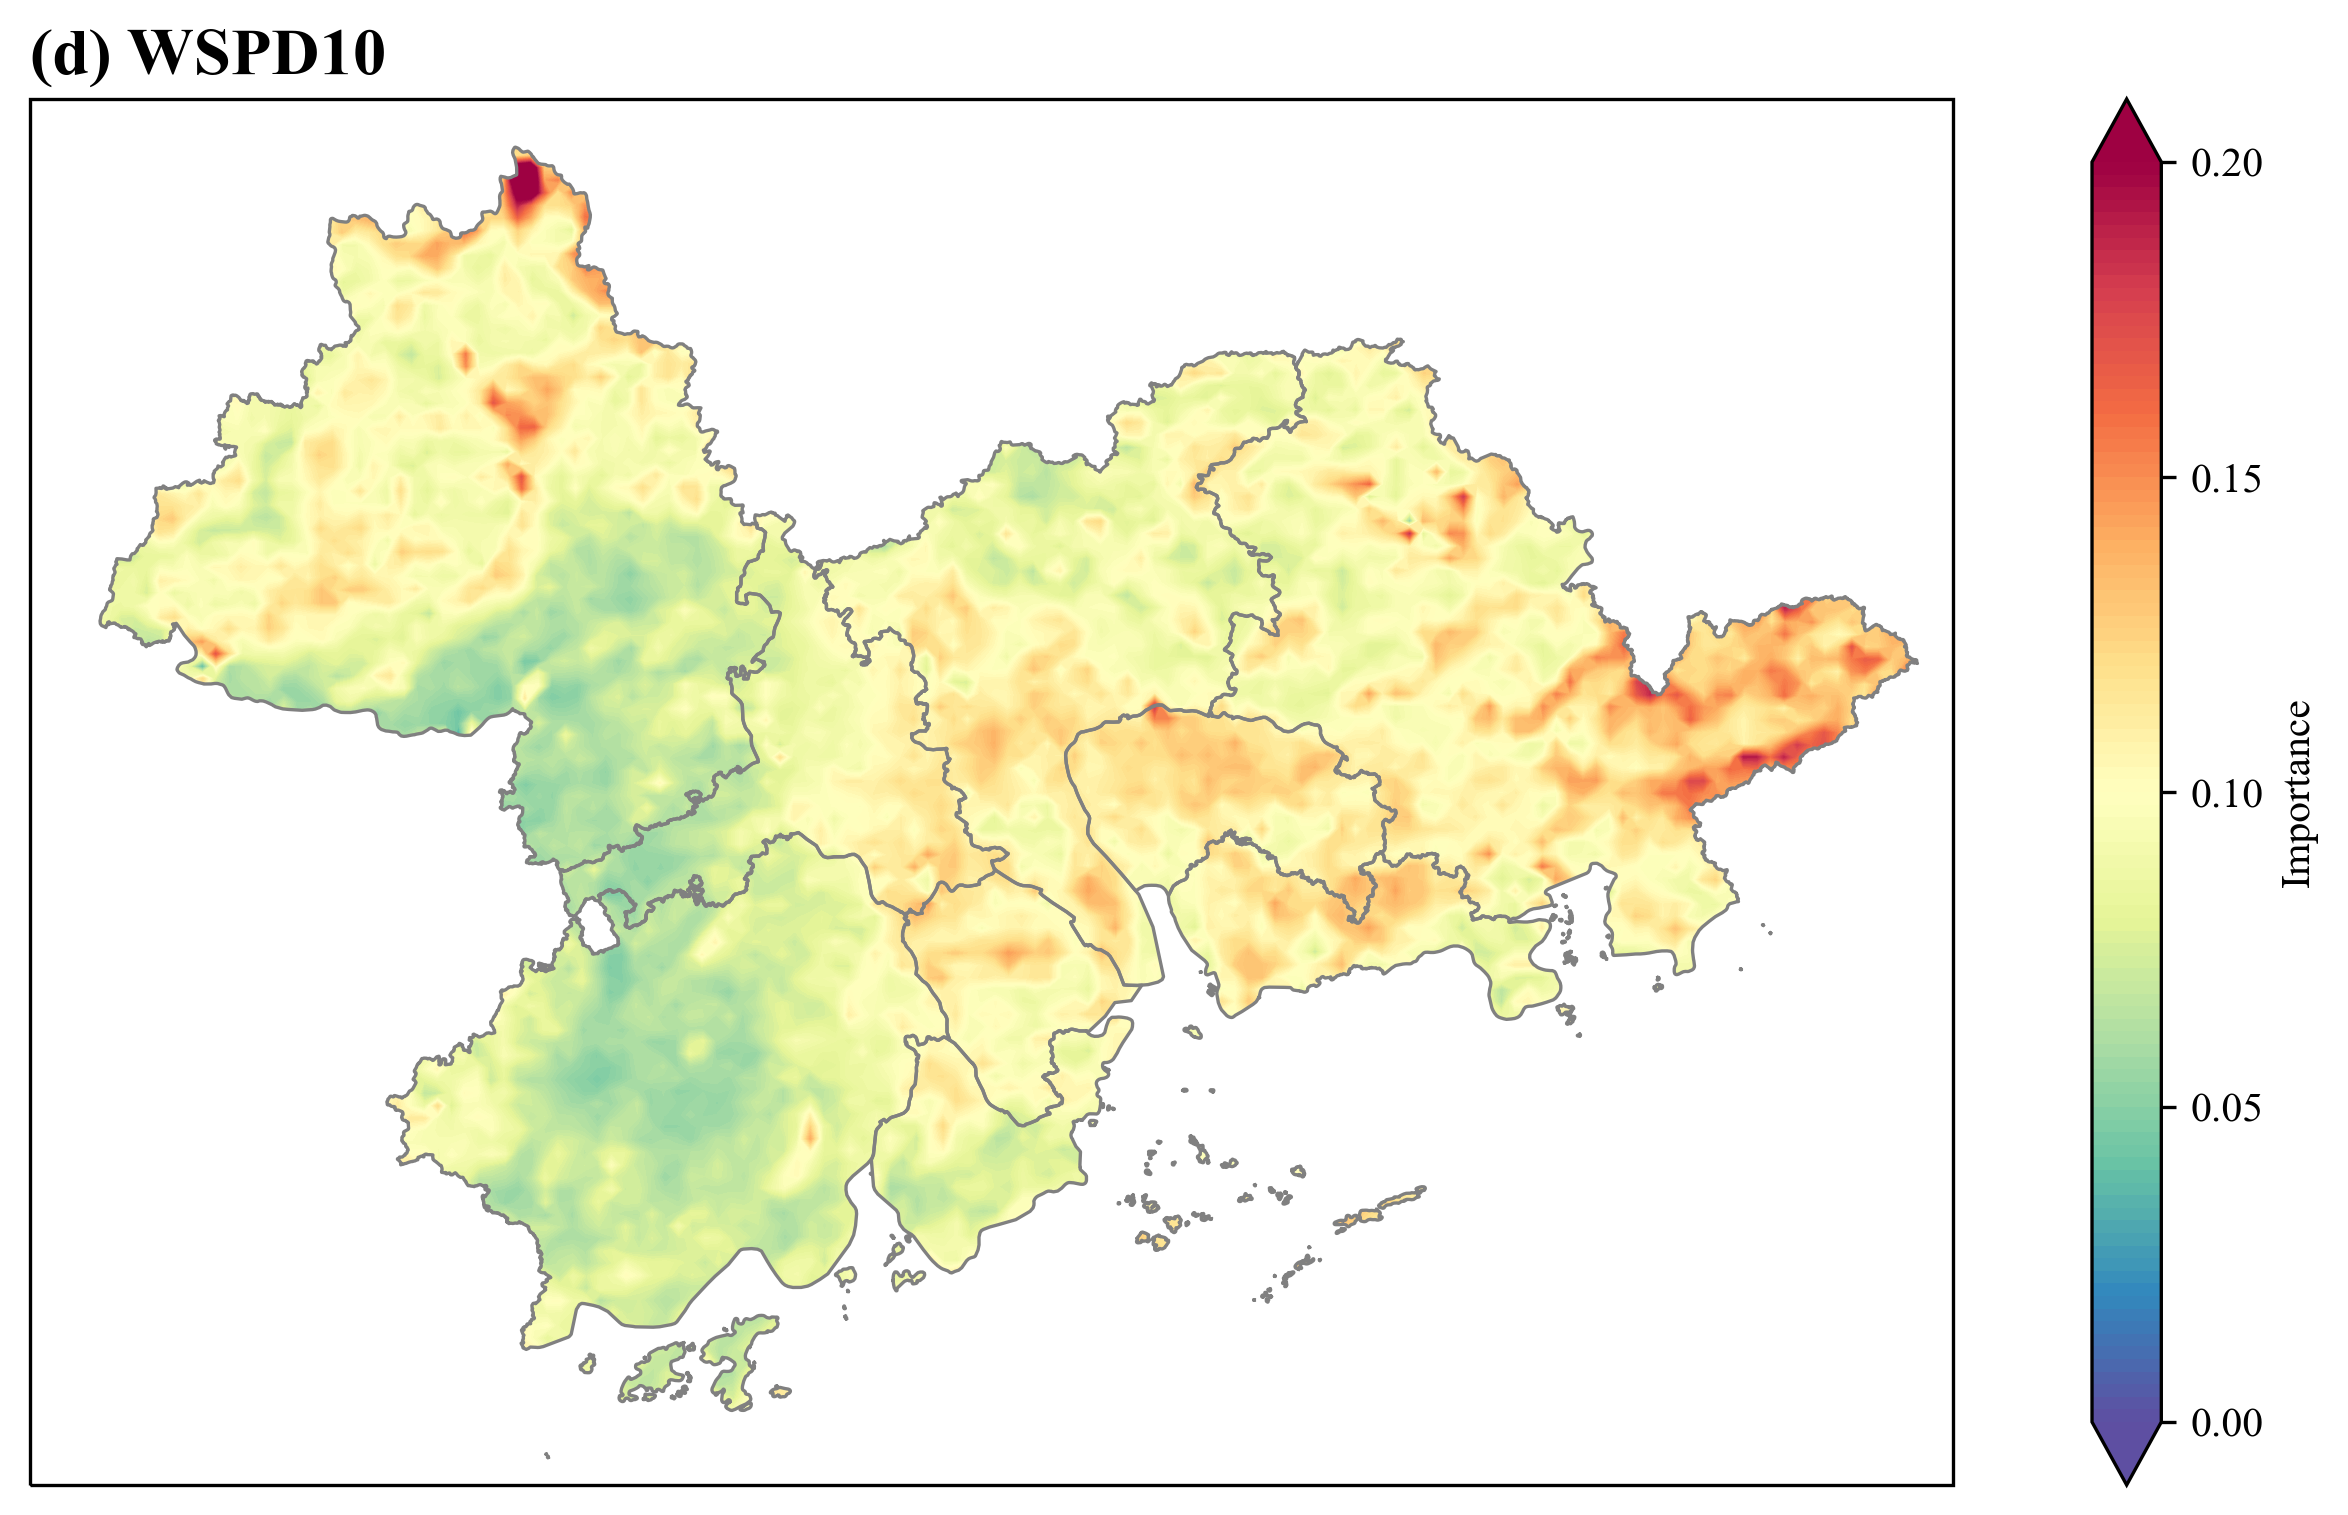

In [36]:
ds       = dshigh
sequence = 'd'
var      = 'WSPD10'
cmax     = 0.2
cfstep   = 0.002
cbstep   = 0.05
colormap = 'Spectral_r'

plot_grids_map(ds, sequence, var, cmax, cfstep, cbstep, colormap)

## 尝试用pcolormesh

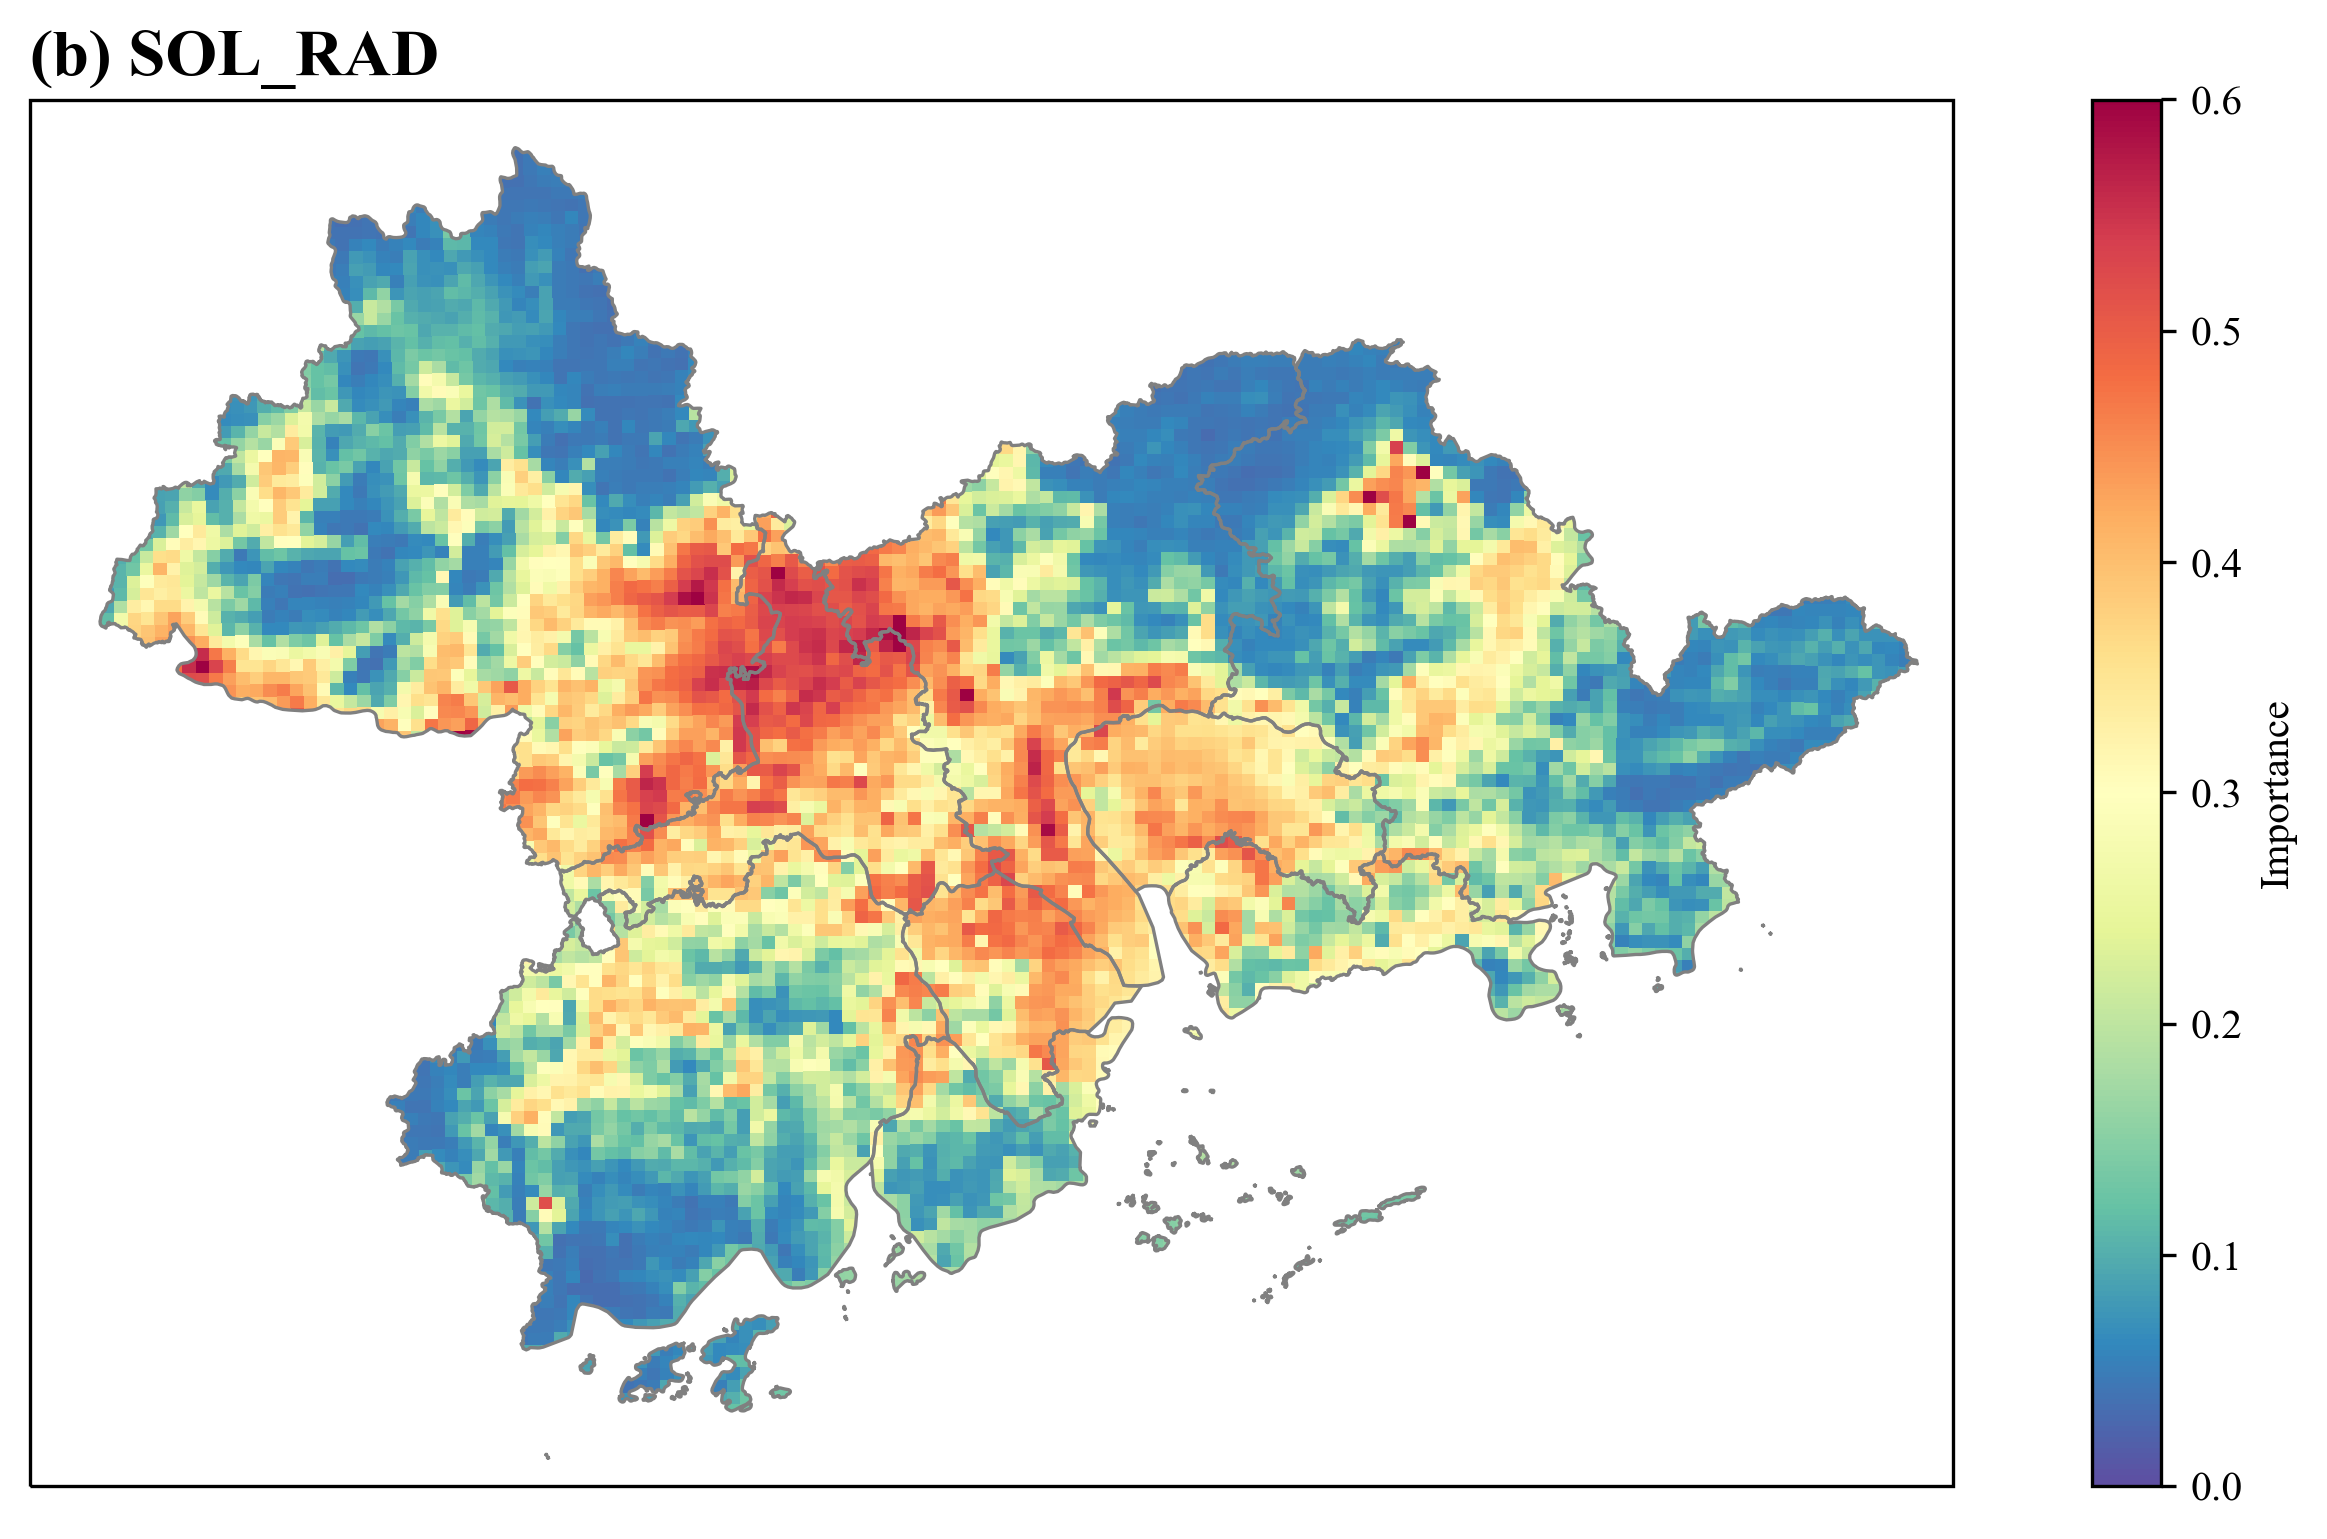

In [23]:
lon = ds.longitude
lat = ds.latitude

vmin = 0
vmax = 0.6
cflevel = np.arange(0,cmax+0.01,cfstep)
cbticks = np.arange(0,cmax+0.01,cbstep)

fig = plt.figure(figsize=(12, 6), dpi=300)
ax = fig.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

cities = ['广州市', '佛山市', '深圳市', '东莞市', '珠海市', '中山市', '惠州市', '江门市', '肇庆市']
multi_polygons = []
for city in cities:
    polygon = get_adm_maps(city=city, record='first', only_polygon=True)
    multi_polygons.append(polygon)
    draw_map(polygon, color='gray', linewidth=0.8)

map_polygon = unary_union(multi_polygons)

ax.set_extent([111.2, 115.5, 21.4, 24.5], ccrs.PlateCarree())

cp = ax.pcolormesh(lon, lat, ds[var], vmin=vmin, vmax=vmax,
                transform=ccrs.PlateCarree(), cmap=colormap,)
clip_pcolormesh_by_map(cp, map_polygon)

cbar = plt.colorbar(cp)
cbar.set_ticks(cbticks)
cbar.set_label('Importance')

title_dict={'fontsize':16,'fontweight':'bold','loc':'left'}
ax.set_title(f'({sequence}) {var}',**title_dict)
plt.show()